# STAT3612 Lecture 8 - 	Tree-based Methods

[Dr. Aijun Zhang](http://www.statsoft.org) & [Mr. Hengtao Zhang](zhanght@connetc.hku.hk) - [STAT3612 Statistical Machine Learning](http://www.statsoft.org/teaching/stat3612/)

1 November 2019

# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.colors as col
def plot_decision_boundary(x, y, model, title):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, 
                    edgecolor='k',cmap=cmap_bold)
    
    plt.title(title, fontsize = 20)

In [3]:
mixture_data = pd.read_table('./mixture.txt',sep=',',index_col=0)
x_mix,y_mix=mixture_data.iloc[:,:2].values,mixture_data['y'].values

Accuracy: 0.79


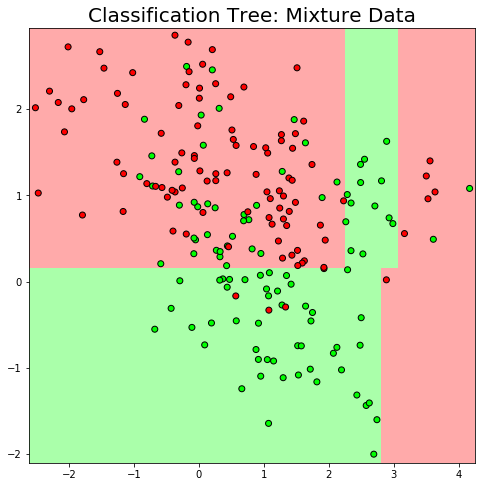

In [4]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_mix,y_mix)

# decision boundary
print('Accuracy:',accuracy_score(y_mix,dt.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,dt,"Classification Tree: Mixture Data")
plt.show()

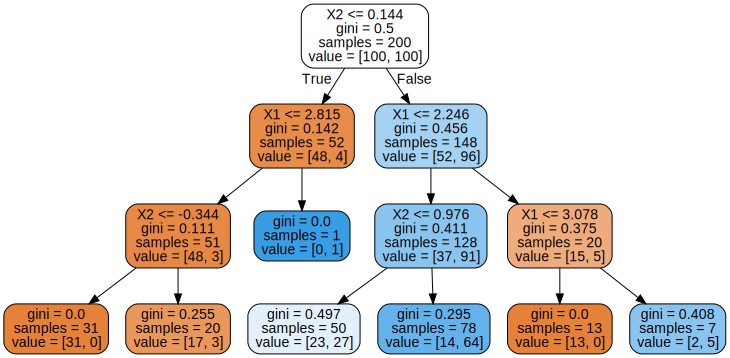

In [5]:
# tree plot
import graphviz
from sklearn.tree import export_graphviz
dot_graph = export_graphviz(
        dt,
        out_file=None, 
        feature_names=['X1','X2'],
        rounded=True,
        filled=True
    )
tree_graph = graphviz.Source(dot_graph)
tree_graph

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
x_iris,y_iris = iris.data[:,:2],iris.target

Accuracy: 0.8133333333333334


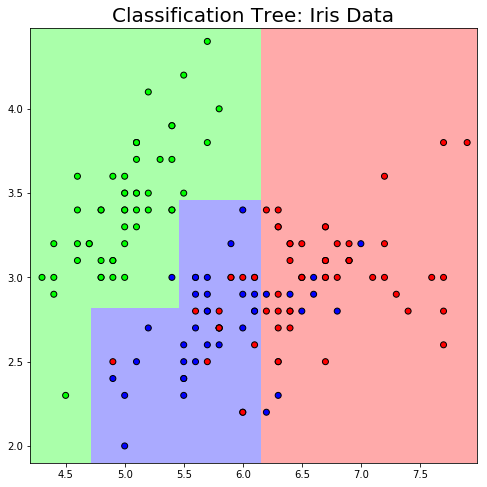

In [7]:
# fit iris data with first two features
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_iris,y_iris)

print('Accuracy:',accuracy_score(y_iris,dt.predict(x_iris[:,:2])))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,dt,"Classification Tree: Iris Data")
plt.show()

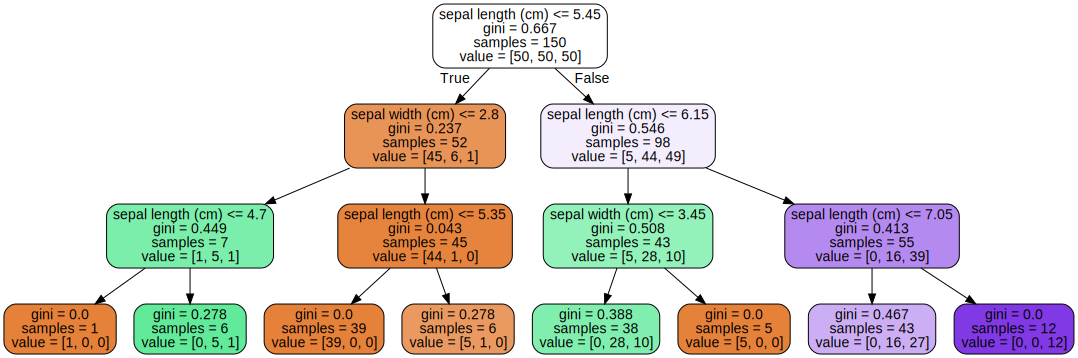

In [8]:
dot_graph = export_graphviz(
        dt,
        out_file=None, 
        feature_names=iris.feature_names[:2],
        rounded=True,
        filled=True
    )
tree_graph = graphviz.Source(dot_graph)
tree_graph

# Bagging

Training Accuracy: 0.93
OOB Accuracy: 0.825


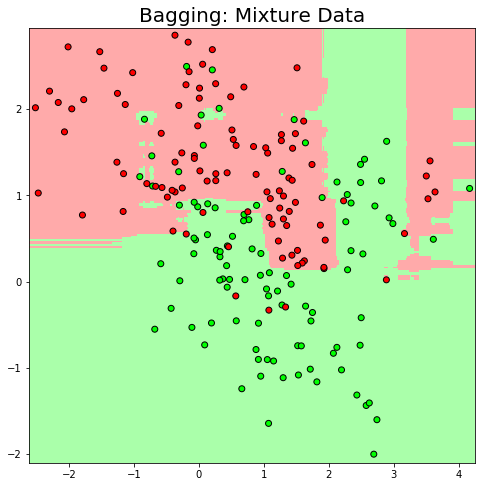

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(n_estimators=300, max_samples=100, oob_score=True)
bag_clf.fit(x_mix, y_mix)
print("Training Accuracy:", accuracy_score(y_mix, bag_clf.predict(x_mix)))
print("OOB Accuracy:", bag_clf.oob_score_)

plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,bag_clf,'Bagging: Mixture Data')
plt.show()

Training Accuracy: 0.9
OOB Accuracy: 0.7133333333333334


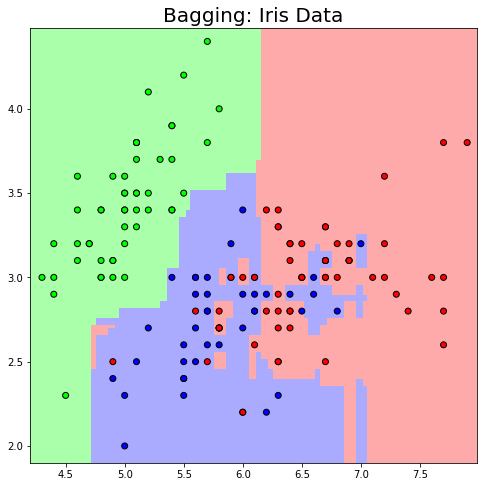

In [10]:
bag_clf = BaggingClassifier(n_estimators=300, max_samples=100, oob_score=True)
bag_clf.fit(x_iris, y_iris)
print("Training Accuracy:", accuracy_score(y_iris, bag_clf.predict(x_iris)))
print("OOB Accuracy:", bag_clf.oob_score_)

plt.figure(figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,bag_clf,'Bagging: Iris Data')
plt.show()

# Random Forests

Training Accuracy: 1.0
OOB Accuracy: 0.825


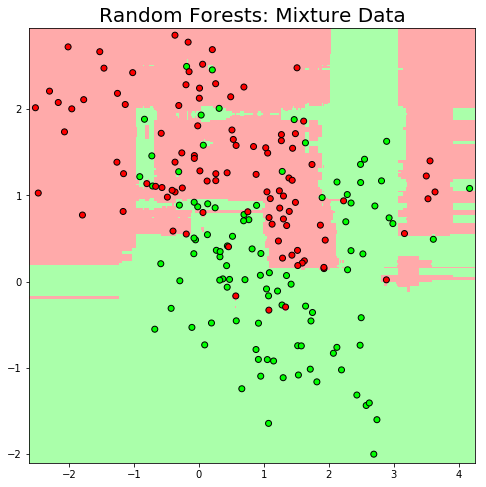

In [11]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=300, oob_score=True)
RF_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, RF_clf.predict(x_mix)))
print("OOB Accuracy:", RF_clf.oob_score_)

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,RF_clf,'Random Forests: Mixture Data')
plt.show()

Training Accuracy: 0.9266666666666666
OOB Accuracy: 0.72


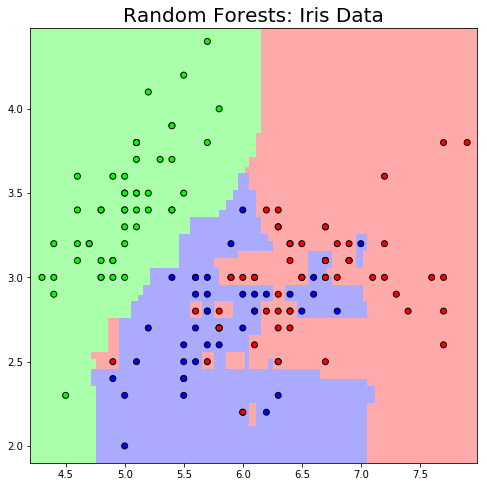

In [12]:
RF_clf = RandomForestClassifier(n_estimators=300, oob_score=True)
RF_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, RF_clf.predict(x_iris)))
print("OOB Accuracy:", RF_clf.oob_score_)

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,RF_clf,'Random Forests: Iris Data')
plt.show()

# AdaBoost

Training Accuracy: 0.91


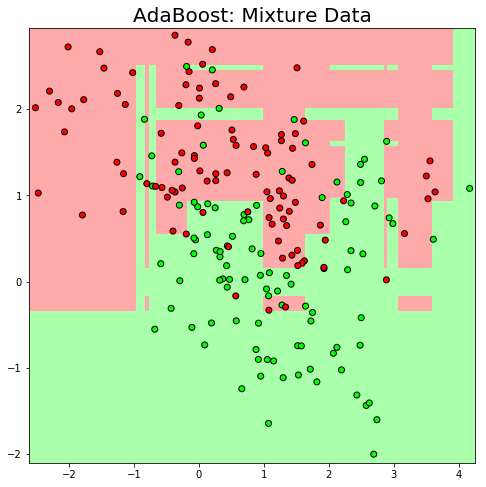

In [13]:
from sklearn.ensemble import AdaBoostClassifier

AB_clf = AdaBoostClassifier()
AB_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, AB_clf.predict(x_mix)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,AB_clf,'AdaBoost: Mixture Data')
plt.show()

Training Accuracy: 0.72


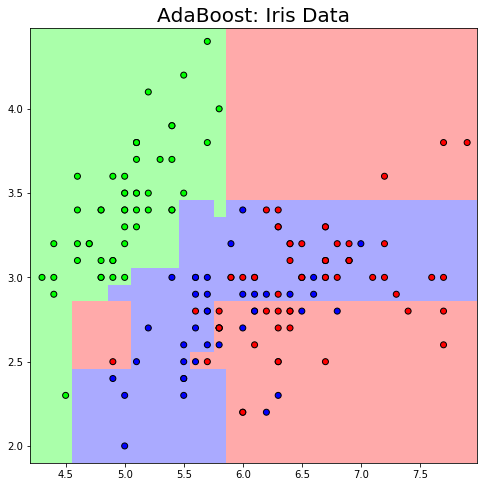

In [14]:
AB_clf = AdaBoostClassifier()
AB_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, AB_clf.predict(x_iris)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,AB_clf,'AdaBoost: Iris Data')
plt.show()

# Gradient Boosting

Training Accuracy: 0.99


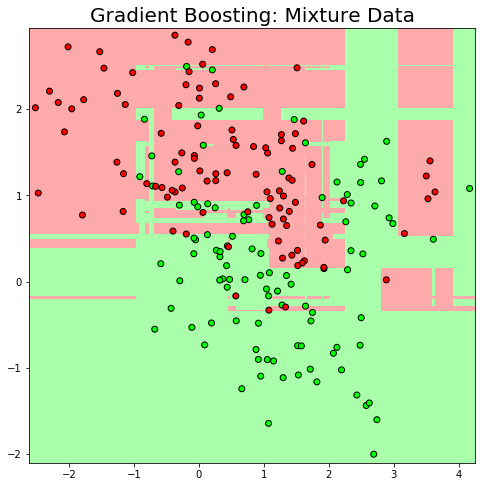

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, GB_clf.predict(x_mix)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,GB_clf,'Gradient Boosting: Mixture Data')
plt.show()

Training Accuracy: 0.92


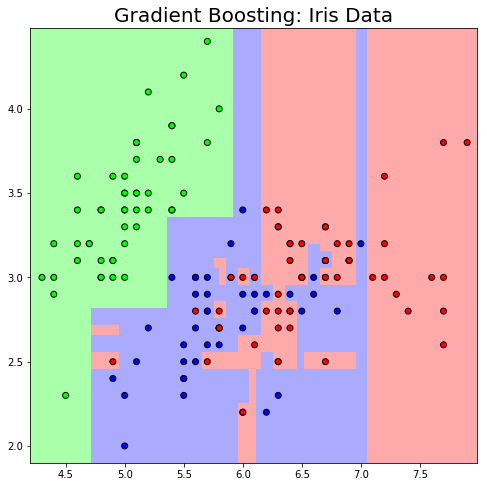

In [16]:
GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, GB_clf.predict(x_iris)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,GB_clf,'Gradient Boosting: Iris Data')
plt.show()

# XGBoost

/Users/zhanght/anaconda3/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Training Accuracy: 0.99


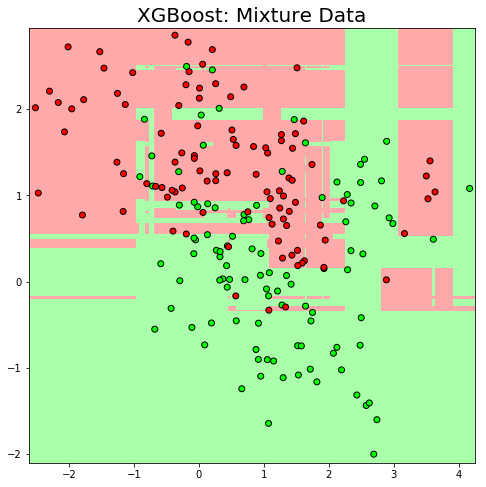

In [17]:
from xgboost import XGBClassifier

XGB_clf = GradientBoostingClassifier()
XGB_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, XGB_clf.predict(x_mix)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,XGB_clf,'XGBoost: Mixture Data')
plt.show()

Training Accuracy: 0.92


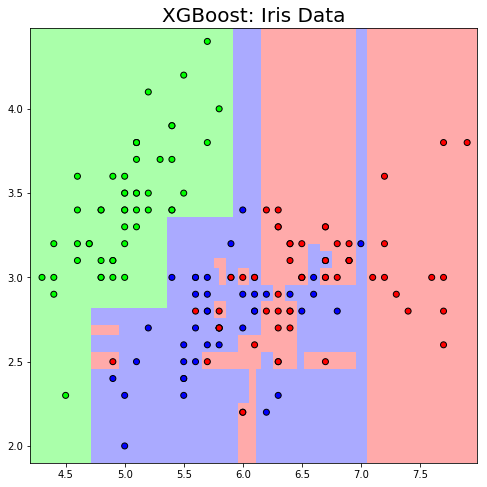

In [18]:
XGB_clf = GradientBoostingClassifier()
XGB_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, XGB_clf.predict(x_iris)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,XGB_clf,'XGBoost: Iris Data')
plt.show()

# Taiwan Credit Case Study

- The following information can be found in [link](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/download).

- This dataset contains the credit information on default payments in Taiwan from April 2005 to September 2005.

- Variable information:
    - **ID**: ID of each client
    - **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    - **SEX**: Gender (1=male, 2=female)
    - **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    - **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
    - **AGE**: Age in years
    - **PAY_0**,**PAY_2**-**PAY_6**: Repayment status in September, August, July, June, May, April. (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ..., 8=payment delay for eight months, 9=payment delay for nine months and above)
    - **BILL_AMT1**-**BILL_AMT6**: Amount of bill statement in September, August, July, June, May, April. (NT_dollar)
    - **PAY_AMT1**-**PAY_AMT6**: Amount of previous payment in September, August, July, June, May, April. (NT_dollar)
    - **default.payment.next.month**: Default payment (1=yes, 0=no)

In [19]:
df = pd.read_csv('./UCI_Credit_Card.csv').iloc[:,1:]

In [20]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [21]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## Preprocessing

In [22]:
import matplotlib.pyplot as plt

### PAY_0, ..., PAY_6

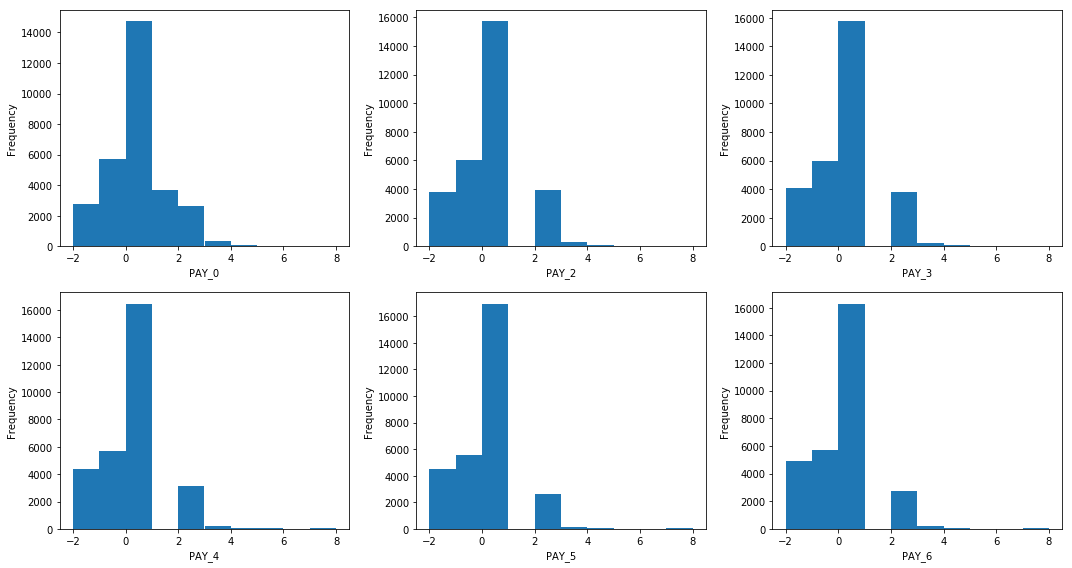

In [23]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
axes = axes.flatten()
for i,ax in enumerate(axes):
    plt.subplot(ax)
    df.iloc[:,5+i].plot.hist(ax=ax)
    plt.xlabel(df.columns[5+i])
plt.tight_layout()

In [24]:
# merge the undocumented values 0 and -2 as a new class labeled by 0
df_cp = df.copy()
cols = ['PAY_0']+['PAY_'+str(i) for i in range(2,7)]
df_cp[cols] = df_cp[cols].replace(-2,0)

In [25]:
df_cp.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### EDUCATION

Text(0.5, 0, 'EDUCATION')

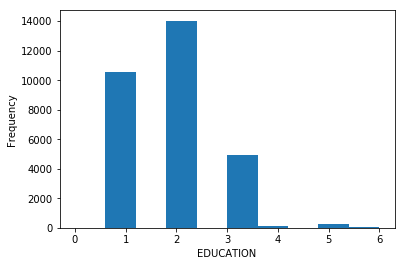

In [26]:
plt.figure()
ax = plt.gca()
df_cp['EDUCATION'].plot.hist(ax=ax)
plt.xlabel('EDUCATION')

In [27]:
df_cp['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
# merge 0, 4-6 as a new class `others&unknown` labeled by 4
df_cp['EDUCATION'] = df_cp['EDUCATION'].replace([0,5,6],[4,4,4])
df_cp['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### MARRIAGE

Text(0.5, 0, 'MARRIAGE')

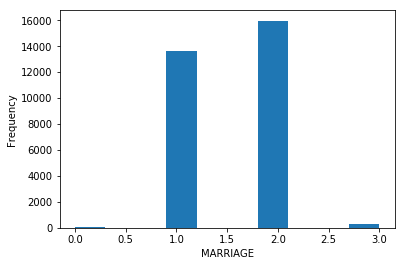

In [29]:
plt.figure()
ax = plt.gca()
df_cp['MARRIAGE'].plot.hist(ax=ax)
plt.xlabel('MARRIAGE')

In [30]:
df_cp['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [31]:
# merge 0 and 3 and label the new class as 3
df_cp['MARRIAGE'] = df_cp['MARRIAGE'].replace(0,3)
df_cp['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### One-hot Encoding

In [32]:
onehot_names = ['SEX','EDUCATION','MARRIAGE','PAY_0']+['PAY_'+str(i) for i in range(2,7)]
onehot_names

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [33]:
df_onehot = pd.get_dummies(df_cp,columns=onehot_names)
df_onehot

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,0,0,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,...,0,0,1,0,0,0,0,0,0,0
29996,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,...,0,0,1,0,0,0,0,0,0,0
29997,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29998,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
# remove the response's name
feature_names = np.delete(df_onehot.columns.values,14)
continuous_names = feature_names[:14]
categorical_names = feature_names[14:]

In [35]:
df_onehot.columns.values

array(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7',
       'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2

### Scaling and Split

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split the data
df_train,df_test = train_test_split(df_onehot,test_size=0.2,random_state=2019)

# scaling
scaler = StandardScaler()

df_train_sc=df_train.copy()
df_train_sc[continuous_names] = scaler.fit_transform(df_train_sc[continuous_names])

df_test_sc=df_test.copy()
df_test_sc[continuous_names] = scaler.transform(df_test_sc[continuous_names])

# splitting
X_train,X_test = df_train_sc[feature_names].values,df_test_sc[feature_names].values
y_train,y_test = df_train['default.payment.next.month'].values,df_test['default.payment.next.month'].values

## Data Modeling

### Tree Methods Comparisons

In [37]:
from sklearn import ensemble,tree
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from tqdm import tqdm

In [38]:
# codes modified from: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
MLA = [
    # ensemble methods
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    
    # tree  
    tree.DecisionTreeClassifier(),
    
    # xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(gpu_id=0),
]

In [39]:
# create table to compare MLA metrics
MLA_columns = ['Name', 'Parameters','Train AUC', 'Test AUC']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# record the results of machine learning algorithm
for i,alg in enumerate(tqdm(MLA)):
    alg.fit(X_train,y_train)
    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[i, 'Name'] = MLA_name
    MLA_compare.loc[i, 'Parameters'] = str(alg.get_params())
    
    auc_train = roc_auc_score(y_train,alg.predict_proba(X_train)[:,1])
    auc_test = roc_auc_score(y_test,alg.predict_proba(X_test)[:,1])

    MLA_compare.loc[i, 'Train AUC'] = auc_train
    MLA_compare.loc[i, 'Test AUC'] = auc_test

MLA_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)
MLA_compare

 17%|█▋        | 1/6 [00:04<00:20,  4.05s/it]/Users/zhanght/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
100%|██████████| 6/6 [00:21<00:00,  3.64s/it]


,Name,Parameters,Train AUC,Test AUC
5,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.804006,0.783046
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.805756,0.782414
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.785647,0.772135
0,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.998888,0.736626
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.9991,0.734262
4,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.999999,0.624245


Text(0, 0.5, 'Algorithm')

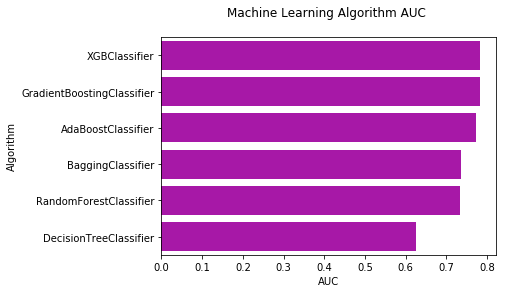

In [40]:
import seaborn as sns

sns.barplot(x='Test AUC', y = 'Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm AUC \n')
plt.xlabel('AUC')
plt.ylabel('Algorithm')

### XGBoost

In [41]:
import xgboost as xgb

In [42]:
xgb_clf = XGBClassifier(gpu_id=1)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              verbosity=1)

#### Variable Importance

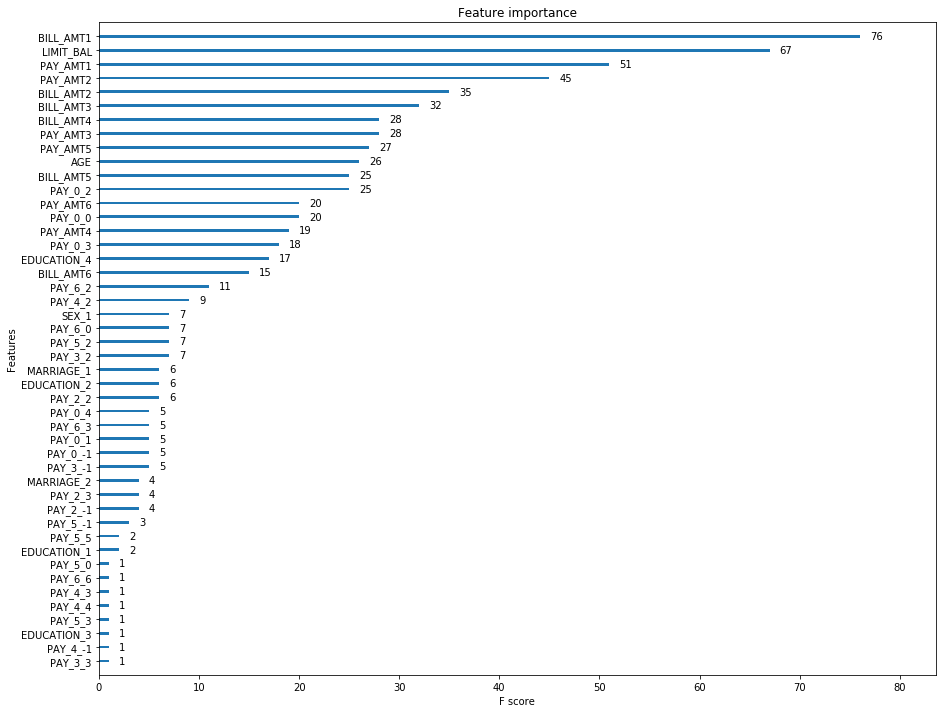

In [43]:
xgb_clf.get_booster().feature_names = list(feature_names)
plt.figure(figsize=(15,12))
ax = plt.gca()
xgb.plot_importance(xgb_clf,grid=False,ax=ax)
plt.show()

#### SHAP

In [44]:
import shap
shap.initjs()
# define the explainer
explainer = shap.TreeExplainer(xgb_clf)
# calculate the shape value
shap_values = explainer.shap_values(X_train)

**Force Plot**

In [45]:
# sample index
i = 1
# force plot
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train[i],feature_names=feature_names)

In [46]:
# force_plot for first 100 trainning samples
shap.force_plot(explainer.expected_value, shap_values[:200], X_train[:200], feature_names=feature_names)

**Summary Plot**

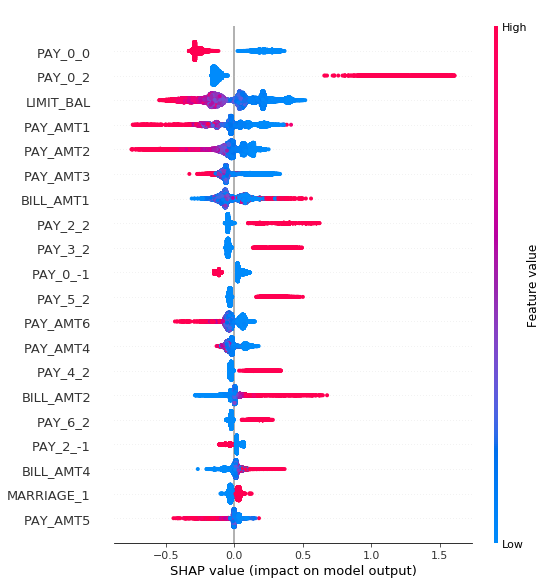

In [47]:
shap.summary_plot(shap_values, X_train,feature_names)

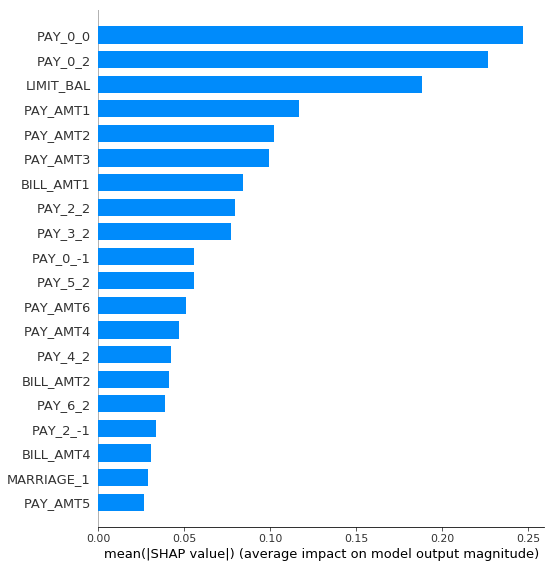

In [48]:
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=feature_names)

**Partial Dependence Plot**

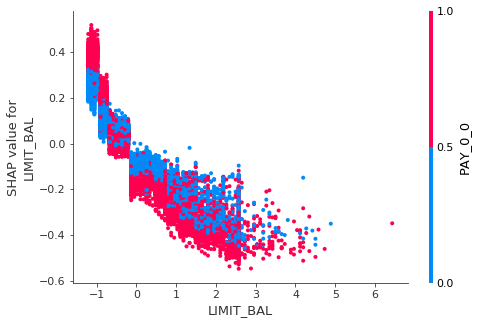

In [49]:
feature_id = 0
shap.dependence_plot(feature_id, shap_values, X_train,feature_names)

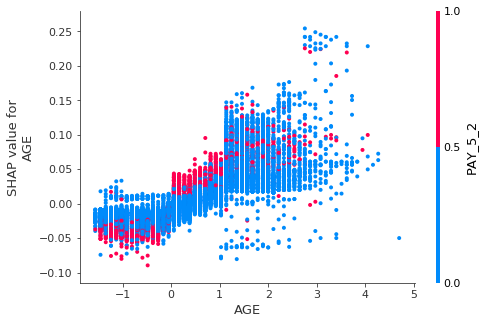

In [50]:
shap.dependence_plot(1, shap_values, X_train,feature_names)

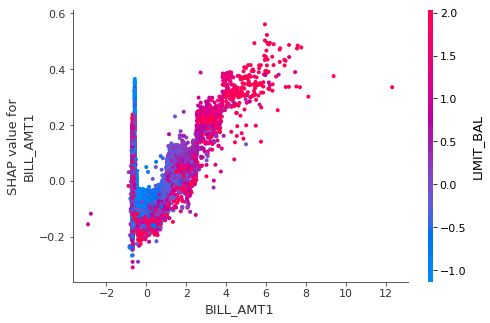

In [51]:
shap.dependence_plot(2, shap_values, X_train,feature_names)

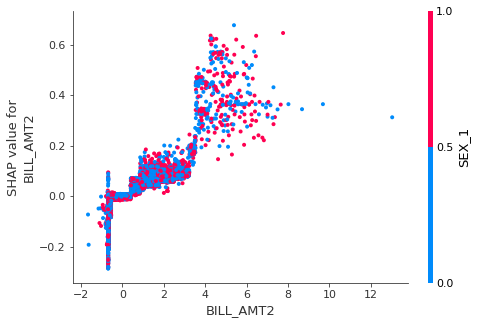

In [52]:
shap.dependence_plot(3, shap_values, X_train,feature_names)